## Bài 3.  Dự báo Heart Disease

### I. IMPORT và hiệu chỉnh dữ liệu:

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
#Import data trực tiếp từ link (data info: https://www.kaggle.com/datasets/mathurinache/cholesterol)
link='https://drive.google.com/file/d/1uv6IA63cXlvgOcvvVF6TAhY2HWZLZ8-v/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
dataset = pd.read_csv(path)

Chú ý về data set:

Cột y dự báo là cột "num" mức độ nguy cơ mắc bênh tim (-> xây dựng bài toán dự báo phân loại)

Tuy nhiên cột "chol" là dữ liệu liên tục có thể tận dụng để thực hành thêm cho các thuật toán hồi quy (có thể kết quả không tốt)

In [ ]:
dataset.sample(20)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
91,62,0,4,160,0,2,145,0,6.2,3,3,7,3,164
225,34,0,2,118,0,0,192,0,0.7,1,0,3,0,210
122,51,1,3,100,0,0,143,1,1.2,2,0,3,0,222
66,60,1,3,140,0,2,155,0,3.0,2,0,3,1,185
214,52,1,4,112,0,0,160,0,0.0,1,1,3,1,230
20,64,1,1,110,0,2,144,1,1.8,2,0,3,0,211
186,42,1,3,120,1,0,194,0,0.8,3,0,7,0,240
71,67,1,4,125,1,0,163,0,0.2,2,2,7,3,254
167,54,0,2,132,1,2,159,1,0.0,1,1,3,0,288
200,50,0,4,110,0,2,159,0,0.0,1,0,3,0,254


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


```
'ca' và 'thal' có kiểu dữ liệu là object cần chuyển đổi để thành kiểu int
```

In [ ]:
for i in dataset.columns:
  unique_values = dataset[i].unique()
  unique_values.sort()
  print(i)
  print(unique_values)
  print('------------')

age
[29 34 35 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57
 58 59 60 61 62 63 64 65 66 67 68 69 70 71 74 76 77]
------------
sex
[0 1]
------------
cp
[1 2 3 4]
------------
trestbps
[ 94 100 101 102 104 105 106 108 110 112 114 115 117 118 120 122 123 124
 125 126 128 129 130 132 134 135 136 138 140 142 144 145 146 148 150 152
 154 155 156 158 160 164 165 170 172 174 178 180 192 200]
------------
fbs
[0 1]
------------
restecg
[0 1 2]
------------
thalach
[ 71  88  90  95  96  97  99 103 105 106 108 109 111 112 113 114 115 116
 117 118 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 177 178 179 180 181 182 184 185 186 187 188 190 192 194 195
 202]
------------
exang
[0 1]
------------
oldpeak
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6

In [ ]:
dataset[(dataset['ca']=='?') | (dataset['thal']=='?')].shape

(6, 14)

In [ ]:
dataset.ca.dtypes

dtype('O')



```
#Trong cột 'ca' và 'thal' có giá trị '?' là Null ta loại bỏ  cái trị này vì chỉ có 6 hàng có giá trị này.
```



In [ ]:
dataset = dataset.drop(dataset[(dataset['ca']=='?') | (dataset['thal']=='?')].index)
dataset[['ca','thal']] = dataset[['ca','thal']].astype(int)

In [ ]:
var_score = pd.DataFrame(dataset.corr().loc['num'].drop('num',axis = 0))
var_score.rename(columns = {'num':'corr_score'}, inplace = True)

In [ ]:
X = dataset.drop(['num'],axis = 1)
y = dataset.num

In [ ]:
from sklearn.preprocessing import StandardScaler
X.iloc[:,[0,3,6,12]] = StandardScaler().fit_transform(X.iloc[:,[0,3,6,12]])

In [ ]:
y.value_counts()

```
Như đề bài đã yêu cầu đây là bài toán phân loại do vậy ta xem xét các mô hình học máy cho bài toán phân loại.
Theo phân tích ở trên ta thấy output y có 5 giá trị [0,1,2,3,4] dữ liệu mất cân bằng ở cái giá trị  và việc dự đoán các giá trị
có ưu tiên như nhau do đó đánh giá mô hình có thể dụa vào "độ chính xác chung".
```




#### Xử lý mất cần bằng cho tập train đẻ đảm bảo tính chính xác của dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 1)

```
#Dùng over_sampling hay under_sampling để xử lý vấn đề mất cân bằng dữ liệu
```

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train,y_train)

In [ ]:
y_train.value_counts()

0    130
2    130
3    130
1    130
4    130
Name: num, dtype: int64


### II. CHỌN BIẾN CHO MÔ HÌNH

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True, cmap = 'coolwarm')

In [ ]:
from sklearn.naive_bayes import GaussianNB
for i in range(1,(X_train.shape[1]+1)):
  print(X_train.iloc[:,0:i].columns)
  model = GaussianNB().fit(X_train.iloc[:,0:i],y_train)
  print(model.score(X_test.iloc[:,0:i],y_test))
#Thử độ chính xác của mô hình khi cho từng biến vào mô hình.

Index(['age'], dtype='object')
0.3
Index(['age', 'sex'], dtype='object')
0.3
Index(['age', 'sex', 'cp'], dtype='object')
0.36666666666666664
Index(['age', 'sex', 'cp', 'trestbps'], dtype='object')
0.35
Index(['age', 'sex', 'cp', 'trestbps', 'fbs'], dtype='object')
0.21666666666666667
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg'], dtype='object')
0.21666666666666667
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach'], dtype='object')
0.23333333333333334
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang'], dtype='object')
0.2833333333333333
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak'],
      dtype='object')
0.3333333333333333
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope'],
      dtype='object')
0.35
Index(['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca'],
      dtype='object')
0

In [ ]:
var_score_1 = []
from sklearn.naive_bayes import GaussianNB
for i in range(0,X_train.shape[1]):
  model = GaussianNB().fit(X_train.iloc[:,[i]],y_train)
  #print(model.score(X_test.iloc[:,[i]],y_test))
  var_score_1.append(model.score(X_test.iloc[:,[i]],y_test))
var_score['invidual_score'] = var_score_1
var_score
#Độ chính xác khi cho duy nhất một biến vào mô hình

,corr_score,invidual_score
age,0.222156,0.300000
sex,0.226797,0.383333
cp,0.404248,0.533333
trestbps,0.159620,0.300000
fbs,0.049040,0.033333
restecg,0.184136,0.266667
thalach,-0.420639,0.400000
exang,0.391613,0.550000
oldpeak,0.501461,0.366667
slope,0.374689,0.350000


In [ ]:
from sklearn.naive_bayes import GaussianNB
var_score_2 = []
for i in (X_train.columns):
  model_drop = GaussianNB().fit(X_train.drop([i],axis =1),y_train)
  model = GaussianNB().fit(X_train,y_train)
  #print(model.score(X_test,y_test) - model_drop.score(X_test.drop([i],axis =1),y_test))
  var_score_2.append(model.score(X_test,y_test) - model_drop.score(X_test.drop([i],axis =1),y_test))
var_score['drop_score'] = var_score_2
var_score
#Thử độ chính xác của mô hình khi loại một biến để xem độ chính xác thay đổi như thế nào

,corr_score,invidual_score,drop_score
age,0.222156,0.300000,0.033333
sex,0.226797,0.383333,0.083333
cp,0.404248,0.533333,0.000000
trestbps,0.159620,0.300000,-0.016667
fbs,0.049040,0.033333,0.016667
restecg,0.184136,0.266667,0.000000
thalach,-0.420639,0.400000,-0.033333
exang,0.391613,0.550000,0.000000
oldpeak,0.501461,0.366667,0.016667
slope,0.374689,0.350000,-0.016667


Qua nhiều lần chạy lại với những tập X_train khác nhau thì drop_score thay đổi, chứng tỏ chỉ số này không phù hợp để làm tham khảo cho việc lựa chọn biến trong data này.

In [ ]:
var_score['Total_score'] = var_score.mean(axis=1)
var_score

,corr_score,invidual_score,drop_score,Total_score
age,0.222156,0.300000,0.033333,0.185163
sex,0.226797,0.383333,0.083333,0.231155
cp,0.404248,0.533333,0.000000,0.312527
trestbps,0.159620,0.300000,-0.016667,0.147651
fbs,0.049040,0.033333,0.016667,0.033013
restecg,0.184136,0.266667,0.000000,0.150268
thalach,-0.420639,0.400000,-0.033333,-0.017991
exang,0.391613,0.550000,0.000000,0.313871
oldpeak,0.501461,0.366667,0.016667,0.294931
slope,0.374689,0.350000,-0.016667,0.236008


```
Sau khi chạy thử nghiệm khoảng 20 lần(tập train thay đổi) nhận thấy rằng biến 'fbs' fast blood sugar:
1. gây sai số tới mô hình
2. tỉ số tương quan không cao.
3. độ chính xác khi cho vào mô hình một mình rất thấp. Do đó quyết định loại
biến 'fbs' ra khỏi mô hình để đỡ phức tạp và tăng độ chính xác cho mô hình.
```


In [ ]:
X_train = X_train.drop(['fbs'],axis = 1)
X_test = X_test.drop(['fbs'], axis = 1)

###III. BƯỚC CHỌN MÔ HÌNH MACHINE LEARNING:
1. Mô hình logistic regression
2. Mô hình Naive-Bayes Classification
3. Mô hình Decision Tree.
4. Mô hình Random Forest.
5. Mô hình KNN
6. Mô hình SVM - SVC

Với các mô hình 3,4,5 ta tiến hành run all code 20 lần để xem xét các parameters
phù hợp với mô hình

####1.Mô hình Logistic Regression
---

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression().fit(X_train,y_train)
print(classification_report(y_test, model_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.20      0.20      0.20        10
           2       0.20      0.09      0.13        11
           3       0.20      0.12      0.15         8
           4       0.07      1.00      0.13         1

    accuracy                           0.47        60
   macro avg       0.31      0.44      0.29        60
weighted avg       0.54      0.47      0.49        60



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


####2.Mô hình Naive-Bayes
---

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB().fit(X_train,y_train)
print(classification_report(y_test, model_GNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.23      0.30      0.26        10
           2       0.00      0.00      0.00        11
           3       0.33      0.25      0.29         8
           4       0.09      1.00      0.17         1

    accuracy                           0.47        60
   macro avg       0.30      0.46      0.30        60
weighted avg       0.51      0.47      0.48        60



In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_BNB = BernoulliNB().fit(X_train,y_train)
print(classification_report(y_test, model_BNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.47      0.57        30
           1       0.08      0.10      0.09        10
           2       0.20      0.09      0.13        11
           3       0.15      0.25      0.19         8
           4       0.09      1.00      0.17         1

    accuracy                           0.32        60
   macro avg       0.25      0.38      0.23        60
weighted avg       0.44      0.32      0.35        60



Chọn mô hình GaussianNB cho độ chính xác tốt hơn

#### 3.Mô hình Decision Tree:
---

Tạo một file csv 'dt_score' để lưu các độ chính xác khi thay đổi max_depth với các tập giá trị khác nhau cho mỗi lần chạy lại chương trình

In [ ]:
from sklearn.tree import DecisionTreeClassifier
pd.DataFrame(list(range(1,15))).to_csv('dt_score.csv',index = False) #Chạy 1 lần
df_score = pd.read_csv('dt_score.csv')
list_score = []
for i in range (1,15):
  model_dt = DecisionTreeClassifier(max_depth = i).fit(X_train,y_train)
  list_score.append(model_dt.score(X_test,y_test))
  #print(i, model_dt.score(X_test, y_test))
df_score= pd.concat((df_score,pd.DataFrame(list_score)),axis = 1)
df_score.to_csv('dt_score.csv',index = False)
  #print(classification_report(y_test, model_dt.predict(X_test)))

In [ ]:
df_score.iloc[:,1:len(df_score)].mean(axis = 1)

0     0.450000
1     0.533333
2     0.383333
3     0.416667
4     0.433333
5     0.483333
6     0.500000
7     0.416667
8     0.483333
9     0.433333
10    0.450000
11    0.400000
12    0.433333
13    0.416667
dtype: float64

Sau khi cho chạy lại mô hình khoảng 20 lần t thấy max_depth = 5 là khoảng giá trị cho độ chính xác tốt nhất.

In [ ]:
model_dt = DecisionTreeClassifier(max_depth= 5).fit(X_train,y_train)
print(model_dt.score(X_test, y_test))

0.4166666666666667


####4.Mô hình Random Forest:
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Tạo file csv một lần duy nhất ở lần chạy đầu tiên. sau đó đổi thành kiểu ghi chú
pd.DataFrame(list(range(1,20))).to_csv('rf_score.csv',index = False) #Chạy 1 lần
df_score_rf = pd.read_csv('rf_score.csv')
list_score_rf = []
for i in range (1,20):
  model_rf = RandomForestClassifier(n_estimators = i).fit(X_train,y_train)
  list_score_rf.append(model_rf.score(X_test,y_test))
  #print(model_rf.score(X_test,y_test))
df_score_rf = pd.concat((df_score_rf,pd.DataFrame(list_score_rf)),axis = 1)
df_score_rf.to_csv('rf_score.csv',index = False)

In [ ]:
df_score_rf.iloc[:,1:len(df_score_rf)].mean(axis = 1)

0     0.400000
1     0.466667
2     0.600000
3     0.500000
4     0.416667
5     0.450000
6     0.500000
7     0.483333
8     0.466667
9     0.466667
10    0.450000
11    0.516667
12    0.483333
13    0.483333
14    0.483333
15    0.516667
16    0.583333
17    0.516667
18    0.483333
dtype: float64

Sau khoảng 20 lần chạy để lấy thông số thì n_estimators = 4 là giá trị tốt nhất:

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 4).fit(X_train, y_train)
model_rf.score(X_test,y_test)

0.5333333333333333

####5.Mô hình KNN:
---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Tạo file csv một lần duy nhất ở lần chạy đầu tiên. sau đó đổi thành kiểu ghi chú
pd.DataFrame(list(range(1,15))).to_csv('knn_score.csv',index = False) #Chạy 1 lần
df_score_knn = pd.read_csv('knn_score.csv')
list_score_knn = []
for i in range (1,15):
  model_knn = KNeighborsClassifier(n_neighbors = i).fit(X_train, y_train)
  list_score_knn.append(model_knn.score(X_test,y_test))
  #print(i,model_knn.score(X_test,y_test))
df_score_knn = pd.concat((df_score_knn,pd.DataFrame(list_score_knn)),axis = 1)
df_score_knn.to_csv('knn_score.csv',index = False)

In [ ]:
df_score_knn.iloc[:,1:len(df_score_knn)].mean(axis = 1)

0     0.500000
1     0.550000
2     0.433333
3     0.483333
4     0.400000
5     0.400000
6     0.450000
7     0.466667
8     0.466667
9     0.416667
10    0.433333
11    0.450000
12    0.483333
13    0.433333
dtype: float64

Qua bảng trên giá trị phù hợp n_neighbors = 2

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)

####6.SVC:
---

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters={
    'C': [0.001, 0.01, 0.1, 1,10],
     'gamma' : [0.001, 0.01,0.1, 0.2, 0.3, 1],
     'kernel' : ['linear','rbf']#, 'poly', 'rbf', 'sigmoid']
}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
result = clf.best_params_ #dict type

In [ ]:
result = pd.DataFrame(result,index = [0])
result

,C,gamma,kernel
0,10,0.3,rbf


In [ ]:
from sklearn.svm import SVC
model_SVC = SVC(C = float(result.loc[:,'C']),
                kernel = result.kernel.iloc[0],
                gamma = float(result.gamma))
model_SVC = model_SVC.fit(X_train,y_train)
model_SVC.score(X_test,y_test)

0.5166666666666667

###IV. Kết luận

In [ ]:
#Model Logistic Regression:
lr_score = model_lr.score(X_test,y_test)
nb_score = model_GNB.score(X_test,y_test)
dt_score = model_dt.score(X_test,y_test)
rf_score = model_rf.score(X_test,y_test)
knn_score = model_knn.score(X_test,y_test)
svc_score = model_SVC.score(X_test,y_test)
dict_score = {'Model_name':['Log_Reg','Nai-Bay','Deci_Tree','Ran_Forest','KNN','SVC'],'Score':[lr_score,nb_score,dt_score,rf_score,knn_score,svc_score]}

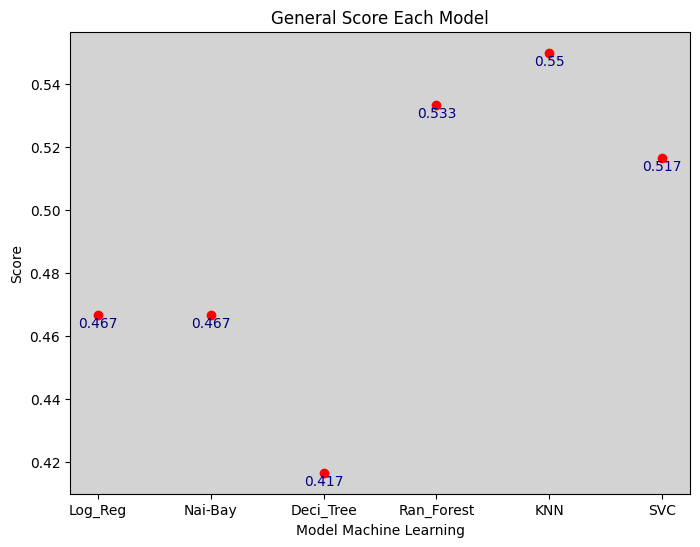

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_facecolor('lightgrey')
plt.scatter(dict_score['Model_name'],dict_score['Score'],c = 'red')
value = list(dict_score.values())
for i in range(len(value[0])):
    plt.text(value[0][i], value[1][i]-0.0004 ,round(value[1][i],3), ha='center',va = 'top',c = 'navy',size=10)
plt.xlabel('Model Machine Learning')
plt.ylabel('Score')
plt.title('General Score Each Model')
plt.show()

###Ta chọn model KNN để dự báo cho heart desease sẽ cho độ chính xác chung là tốt nhất